# Extrémy funkcí

Naimportujeme si knihovny potřebné pro následující příklady:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Hledání extrémů funkce jedné proměnné
- Pro ohraničení (lokálního) minima/maxima musíme znát hodnoty funkce ve třech bodech $a, b, c$
- Budeme se zabývat hledáním minima
- Nechť
$a < b < c \wedge f(a) > f(b) < f(c),$

pak existuje (lokální) minimum funkce $f(x)$ na intervalu $(a,c)$.
- Ke zúženı́ intervalu ohraničujı́cı́ho minimum potřebujeme **čtvrtý** bod

### Metoda zlatého řezu
- Vzdálenost čtvrtého bodu od krajů je v poměru [zlatého řezu](https://www.mathsisfun.com/numbers/nature-golden-ratio-fibonacci.html): $d=c - \dfrac{3-\sqrt{5}}{2}(c-a)$
- Chyba určení minima v $(i+1).$-iteraci je $\epsilon_{i+1}=(1-W)\epsilon_i$, kde $W = \dfrac{3-\sqrt{5}}{2}$. Jedná se tedy o lineární metodu.

<div class="alert alert-block alert-warning"><b>Cvičení 07.01: </b> Najděte minimum funkce $f(x)=-\sin(x)$ na intervalu $\langle 0, \pi  \rangle$ metodou zlatého řezu.</div>

In [24]:
#
# priklad minimalizace funkce jedne promenne metodou zlateho rezu

# zadejme si funkci -sin(x)
def f(x):
    return -np.sin(x)

# na zacatku nastavme uvodni body metody a < c , minimum by melo byt nekde
# kolem pi/2=1.5708, a bude mezi temito dvema body, bod b budeme dopocitavat
a = 0
c = np.pi

# nastavme presnost, se kterou chceme nalezt minimum
presnost = 1e-3

# ulozime si zlaty rez
zlatyRez = (3-np.sqrt(5))/2 # ~0.38

# napocteme prvni nastrel bodu b
b = a+zlatyRez*(c-a)

# budeme pocitat pocet iteraci (provedeni cyklu) do dosazeni pozadovane presnosti
pocetiteraci = 0

# hledani probiha v cyklu
while True:
    if (c-a) < presnost: # skoncime, pokud je minimum urceno dostatecne presne
        break
    
    if (b-a)/(c-a)<0.5:
        # nyni mame body a<b<c, pokud bod b je v leve casti intervalu < a,c >,
        # ponechame ho tam, a dopocitame bod d
        d = a+(1-zlatyRez)*(c-a) # 1-zlatyRez ~ 0.62
    else:
        # pokud je bod b v prave casti intervalu < a,c > (tzn vznikl v prubehu
        # iteraci), preznacime ho na d a dopocteme polohu bodu b
        d = b
        b = a+zlatyRez*(c-a)
    # nyni mame a<b<d<c, zjistime ve kterem intervalu je minimum
    if f(a)>=f(b) and f(b)<=f(d): # minimum je v intervalu < a,d >, ten navic obsahuje bod b
        c = d # presuneme pravy konec intervalu do bodu d, bod b nechame na svem miste
    else: #minimum je v intervalu < b,c >, ten navic obsahuje bod d
        tmp = b
        b = d # bod d se stane novym bodem b
        a = tmp # levy okraj presuneme do puvodniho bodu b
    #[a c]
    pocetiteraci += 1

print('Minimum je v intervalu <',a,',',c,'>')

import math
print(math.pi/2)     # vime, ze minimum funkce f(x)=-sin(x) by melo byt v bode Pi/2, proto ho pro kontrolu vypiseme
print('pocet provedenych iteraci: ', pocetiteraci)

Minimum je v intervalu < 1.5701884334977818 , 1.5710681849419796 >
1.5707963267948966
pocet provedenych iteraci:  17


### Metoda parabolické interpolace
- Odhad minima je určen vztahem:
$d = b-\dfrac{1}{2}\dfrac{(b-a)^{2}[f(b)-f(c)]-(b-c)^{2}\left[f(b)-f(a)\right]}{(b-a)\left[f(b)-f(c)\right]-(b-c)\left[f(b)-f(a)\right]}$
- Kvadratická metoda, může být neefektivní daleko od minima, proto je optimální přepínání mezi parabolickou interpolací a metodou zlatého řezu.

<div class="alert alert-block alert-warning"><b>Cvičení 07.02: </b> Najděte minimum funkce $f(x)=-\sin(x)$ na intervalu $\langle 0, \pi  \rangle$ metodou parabolické interpolace. Porovnejte počet provedených iterací v případě parabolické interpolace a metody zlatého řezu pro požadovanou přesnost $\epsilon=0.001$. Jak se situace změní při zvýšení požadované přesnosti o tři řády?</div>

In [39]:
# hledani minima parabolickou interpolaci

# zadejme si funkci -sin(x)
def f(x):
    return -np.sin(x)

# na zacatku nastavme uvodni body metody a < b < c , minimum by melo byt nekde
# kolem pi/2=1.5708
a = 0
b = 0.3
c = np.pi

# nastavme presnost, se kterou chceme nalezt minimum
presnost = 1e-3

# budeme pocitat pocet iteraci (provedeni cyklu) do dosazeni pozadovane presnosti
pocetiteraci = 0

# hledani probiha v cyklu
while True:
    if (c-a) < presnost: # skoncime, pokud je minimum urceno dostatecne presne
        break
    
    # z a,b,c odhadneme polohu d minima paraboly, kterou jsme prolozili body
    # a,b,c
    d = b-0.5*((b-a)**2*(f(b)-f(c))-(b-c)**2*(f(b)-f(a)))/((b-a)*(f(b)-f(c))-(b-c)*(f(b)-f(a)))
    
    # zjistime, zda nastala situace a < d < b < c nebo a < b < d < c
    if d < b: # nastala situace a < d < b < c
        # zjistime, na kterem intervalu je minimum
        if f(a) > f(d) and f(d) < f(b): # minimum je na intervalu  < a,b > , ktery obsahuje bod d
            c = b # posuneme pravy okraj do bodu b
            b = d # treti bod uprostred bude tvoren bodem d
        else: # minimum je na intervalu  < d,c > , ktery obsahuje bod b
            a = d # posuneme levy okraj do bodu d
    else: # nastala situace a < b < d < c
        # zjistime, na kterem intervalu je minimum
        if f(a) > f(b) and f(b) < f(d): # minimum je na intervalu  < a,d >  obsahujicim bod b
            c = d # posuneme pravy okraj do bodu d
        else: # minimum je na intervalu  < b,c >  obsahujicim bod d
            a = b # posuneme levy okraj do bodu b
            b = d # treti bod uprostred bude tvoren bodem d
            
    pocetiteraci += 1


print('Minimum je v intervalu <',a,',',c,'>')
print('pocet provedenych iteraci: ', pocetiteraci)

# Pocet provedenych iteraci je v pripade pouziti metody parabolicke interpolace nekolikanasobne mensi nez v pripade metody zlateho rezu.
# Jedna se o rychlejsi metodu v blizkosti (lokalniho) minima (metoda parabolicke interpolace vs. zlateho rezu = kvadraticka vs. linearni metoda).

Minimum je v intervalu < 1.5707963267948968 , 1.5707963749762517 >
pocet provedenych iteraci:  5


## Hledání extrémů funkce více proměnných

### Nelder-Mead (simplex) metoda
- Využívá (N + 1)-simplex v N-dimenzionálním prostoru
- Simplex posunujeme tak, aby ohraničil minimum
- Pak se zmenšuje, dokud není minimum známo s dostatečnou přesností
- [Animace](https://www.youtube.com/watch?v=KEGSLQ6TlBM)
- Ukázka postupu při hledání minima funkce o dvou proměnných:
 1. Zajistíme, aby $f(W=\mathrm{Worst})>f(G=\mathrm{Good})>f(B=\mathrm{Best})$
 2. **Reflexe** vrcholu $W$ na $R$:
   1. $M=\dfrac{B+G}{2}$
   2. $R=M+(M-W)$
   3. Pokud $f(R)<f(W)$, přesuneme sem bod $W$
 3. **Expanze** vrcholu $R$:
   1. $R$ posuneme o $M-W$ do $E$
   2. Pokud $f(E)<f(R)$, přesuneme sem bod $W$
 4. Pokud nelze splnit kroky 2. a 3., provedeme **kontrakci**:
   1. Vytvoříme $C$ uprostřed úsečky $\lvert WM\rvert$
   2. Pokud $f(C)<f(W)$, přesuneme sem bod $W$
 5. Pokud nelze splnit krok 4., provedeme **zmenšení**:
   1. Vytvoříme $S$ uprostřed úsečky $\lvert WB\rvert$
   2. Bod $W$ přesuneme do $S$
   3. Bod $G$ přesuneme do $M$
        

### Metoda největšího spádu
- Postup pro hledání minima funkce $f(\vec{x})$:
    1. stanovíme počáteční odhad řešení $\vec{x_0}$
    2. spočítáme $\nabla{f(\vec{x_0})}$
    3. provedeme krok směrem největšího spádu $\vec{x}=\vec{x_0}-\alpha \nabla{f(\vec{x_0})}$
    4. iterativně opakujeme postup od bodu 2 (předtím přiřadíme $\vec{x_0}=\vec{x}$), přičemž můžeme postupně zmenšovat hodnotu koeficientu $\alpha$. 


<div class="alert alert-block alert-warning"><b>Cvičení 07.03: </b>Najděte minimum funkcí $f_{1}(\vec{x})=x^{2}+y^{2}$ a  $f_{2}(\vec{x})=100(x-y^{2})^{2}+(1-x)^{2}$ metodou nejmenšího spádu. </div>

 $f_2$ je tzv. banánová funkce ([Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function)), resp. její upravená verze

minimum: [0.92256845 0.96041816] chyba: 0.0188845408113485 iteraci: 200
minimum(SciPy): [0.99999953 0.99999982]


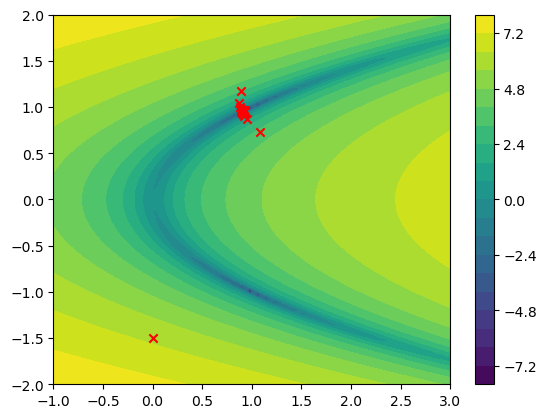

In [3]:
# metoda nejvetsiho spadu

from scipy import linalg, optimize

def f1(X):
    x1, x2 = X
    return x1**2+x2**2    

def f2(X):
    x1, x2 = X
    return 100*(x1-x2**2)**2+(1-x1)**2    

def gradfce(f, X, h):  # vypocet parcialnich derivaci metodou centralni diference
    x, y = X
    return np.array([(f((x + h, y)) - f((x - h, y))) / (2*h), (f((x, y + h)) - f((x, y - h))) / (2*h)])

# nastavime presnost, se kterou chceme nalezt minimum
presnost = 1e-4

# pocatecni bod
x0 = [0, -1.5]


# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = [] # odhad chyby v jednotlivych krocich
reseni = [] # aktualni odhad reseni

f = f2 # urceni funkce, jejiz minimum budeme hledat

grad = gradfce(f, x0, 0.00001)
epsilon.append(np.abs(grad @ grad))
reseni.append(x0)

#alpha = 0.02      # nastaveni pro f1
alpha = 0.002     # nastaveni pro f2
maxIteraci = 200

# hledani probiha v cyklu
while True:
    if len(reseni) >= maxIteraci: # skoncime, pokud je minimum urceno dostatecne presne nebo hodne iteraci
        break
    
    alpha *= 0.99  # vylepseni metody - zmensovani kroku
    
    grad = gradfce(f, x0, 0.00001)
    x = x0 - alpha * grad  # krok metody

    epsilon.append(np.abs(grad @ grad))
    reseni.append(x)
    
#    print(x, grad)
    
    if np.abs(grad @ grad) < presnost:
        break
        
    x0 = x

minimum = reseni[-1] # odhad konecneho reseni
chyba = epsilon[-1] # odhad konecne chyby
iteraci = len(reseni)

minCG = optimize.minimize(f, x0, method="CG").x

print("minimum:", minimum, "chyba:", chyba, "iteraci:", iteraci)
print("minimum(SciPy):", minCG)


osa_x = np.linspace(-1, 3, 100)
osa_y = np.linspace(-2, 2, 100)
#osa_x = np.linspace(0.8, 1.2, 100)    # nastaveni pro zobrazeni, co se deje v okoli minima f2
#osa_y = np.linspace(0.8, 1.2, 100)

(x,y) = np.meshgrid(osa_x, osa_y)

z = np.log(f((x, y)))

plt.contourf(x, y, z, levels=20)
plt.colorbar();

reseni = np.array(reseni)

plt.scatter(reseni[:,0], reseni[:,1], c='r', marker='x');
#plt.scatter(reseni[10:,0], reseni[10:,1], c='r', marker='x');   # nastaveni pro zobrazeni, co se deje v okoli minima f2

# v pripade bananove funkce (f2) je metoda nejmensiho spadu po dosazeni "udoli" neefektivni

### Metoda konjugovaných gradientů
- Postup pro hledání minima funkce $f(\vec{x})$ je odlišný oproti metodě největšího spádu. Směr minimalizace sice vychází z $\nabla f(\vec{x})$, ale je upraven tak, abychom neztratili minimum v předchozím směru. Minimum ve směru $\vec{h_k}$ stanoveném pro každý krok $k$ vždy nalezneme dle vzorce. 
- Detailnější postup:
 1. Zadej počáteční odhad $\vec{x_0}$.
 2. Spočti $\vec{g_0} = - \nabla f(\vec{x_0})$ a zvol počáteční směr minimalizace $\vec{h_0} = \vec{g_0}$.
 3. Minimalizací ve směru $\vec{h_k}$ se z bodu $\vec{x_k}$ přesuň do nového odhadu minima $\vec{x_{k+1}}$. Minimum v daném směru nalezneme jako $\vec{x_{k+1}} = \vec{x_k} + \alpha_k \vec{h_k}$, kde 
$\alpha_k = - \dfrac{(\nabla f(\vec{x_k})) \cdot \vec{h_k}}{\vec{h_k} \cdot (H \vec{h_k}^T)}$ a $H$ je Hessova matice (matice druhých parciálních derivací).
 4. Spočti gradient $\vec{g_{k+1}} = - \nabla f(\vec{x_{k+1}})$. 
 5. Vypočítej $\beta_k = \dfrac{\vec{g_{k+1}} \cdot \vec{g_{k+1}}} {\vec{g_{k}} \cdot \vec{g_{k}}}$ (Fletcher-Reeves) nebo $\beta_k = \dfrac{(\vec{g_{k+1}}-\vec{g_k}) \cdot \vec{g_{k+1}}} {\vec{g_{k}} \cdot \vec{g_{k}}}$ (Polak-Ribiere).
 6. Urči nový směr pro minimalizaci $\vec{h_{k+1}}=\vec{g_{k+1}} + \beta_k \vec{h_k}$.
 7. Opakuj iterativně postup od kroku 3 - minimalizací ve směru $\vec{h_{k+1}}$ najdi bod $\vec{x_{k+2}}$, atd.
 8. Skonči pokud je minimum nalezeno s dostatečnou přesností.


## Úloha 7.D

<div class="alert alert-block alert-warning"><b>Úloha 7.D: </b> Najděte minimum funkce $f(\vec{x})=100(x-y^{2})^{2}+(1-x)^{2}$ metodou konjugovaných gradientů. Metodu konjugovaných gradientů sami implementujte (není povoleno přímé použití této metody jejím voláním příslušnou funkcí z knihoven Pythonu, je však povoleno použití funkcí z knihoven Pythonu pro skalární násobení dvou vektorů, výpočet normy vektoru, apod.) Použijte pro to algoritmus metody výše uvedený, počáteční odhad řešení nastavte na $\vec{x_0}=(0, -1.5)$. Podívejte se na detail vývoje hledání minima v okolí lokálního minima ($x_{min}=1, y_{min}=\pm1$) a porovnejte to s již implementovanou metodou největšího spádu (ve cvičení 07.03). 
 </div>